# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sohanjs111/Machine-Learning/main/Database/Ads_CTR_Optimisation.csv')

## Implementing UCB

### Initialize the variables
* N = the number of users
* d = the number of ads
* ads_selected = full list of ads selected over the round (initial empty)
* numbers_of_selections = numbers of times each ad was selected for all the ads. (initial it with 'd' zeros) {$N_i$}
* sums_of_rewards = sums of rewards for each of the ad up round N (initial it with 'd' zeros) {$R_i$}
* total_rewards = Total reward accumulated over the rounds (initialize is as 0)


In [3]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

In [4]:
import math

### Creating the for loop 

In [5]:
for n in range(0, N):                                   #                for loop for N (users)
  ad = 0                                                #                start from ad zero
  max_upper_bound = 0                                   #                to compare the maximum UCB
  for i in range(0, d):                                 #                for loop for d (ads)
    if (numbers_of_selections[i] > 0):                  #    (Step 2)    check if the ad was selected atleast once
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) # make sure it wont be log(0) 
      upper_bound = average_reward + delta_i
    else:                                               #    (Step 3)
      upper_bound = 1e400                               #    else set the UCB to inifinty 
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound                     #                update the max UCB
      ad = i                                            #                update the ad that is used
  # Update the initiatied variables
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

In [6]:
print(sums_of_rewards)
print(total_reward)

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
2178


In [7]:
sums_of_rewards.index(max(sums_of_rewards))+1

5

## Visualising the results

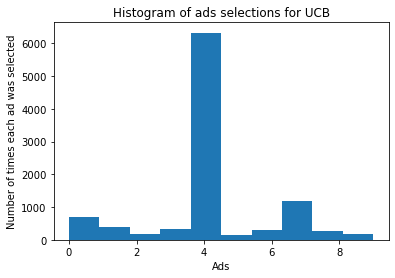

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections for UCB')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()